### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

##### Студент:  Мерич Дорук Каймакджыоглу
##### Группа: НКНбд-01-20

## Москва 2023
***

### Вариант №  26

In [1]:
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import random
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    num_row = 2
    num_col = 5 
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    for i in range(num_row * num_col):
        img = imgs[i] 
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [3]:
df_train = tfds.as_dataframe(tfds.load("deep_weeds", split='train[:30%]'))
df_test = tfds.as_dataframe(tfds.load("deep_weeds", split='train[30%:40%]'))

2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

In [4]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)

In [5]:
train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

In [6]:
train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

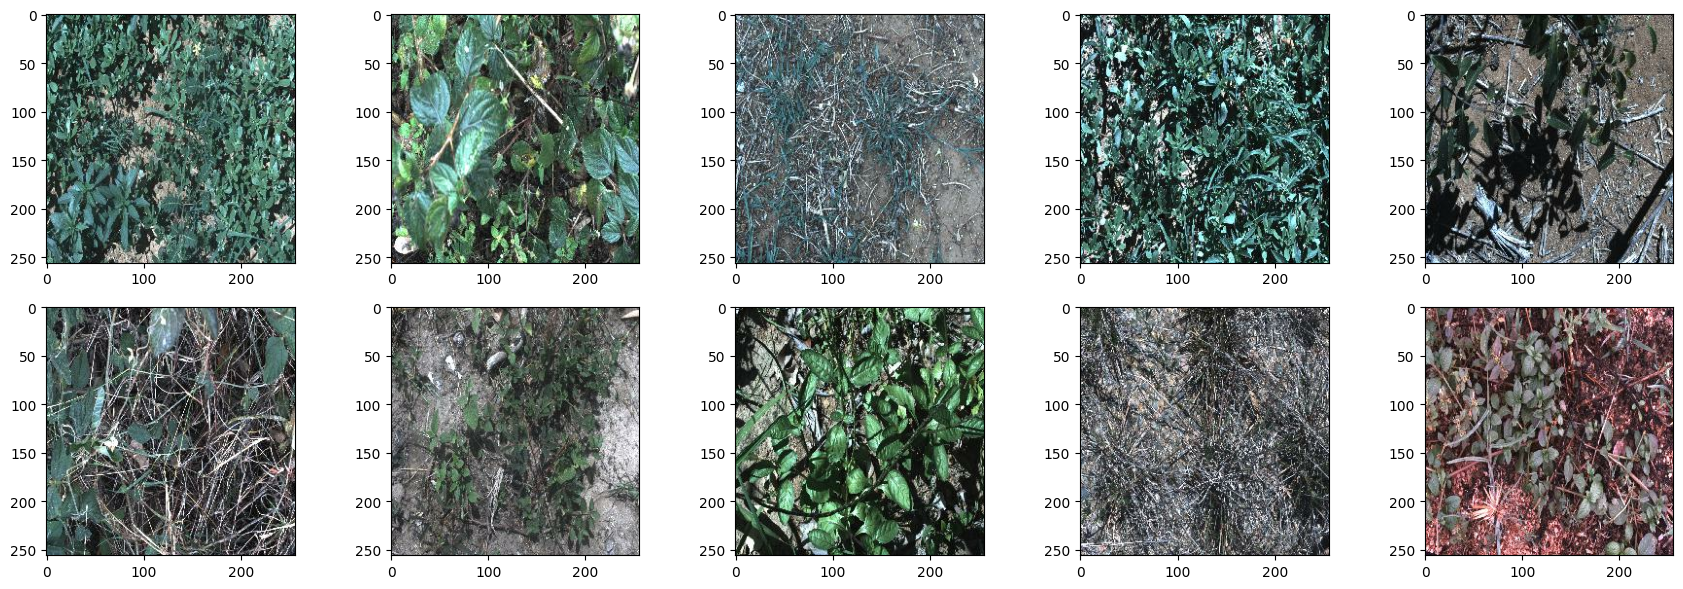

In [7]:
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))
train_images.shape, test_images.shape
train_images /= 255
test_images  /= 255
plot_random_sample(test_images)

3. Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению).  

In [8]:
df_train['label'].value_counts()

8    2751
3     345
1     328
6     324
4     313
2     306
0     304
5     303
7     279
Name: label, dtype: int64

In [9]:
df_test1 = []
for i in df_test.values:
    if i[1] in (6,7):
        df_test1.append(i)

df_test = pd.DataFrame(df_test1)
df_test[1].value_counts()

df_train1 = []
for i in df_train.values:
    if i[1] in (6,7):
        df_train1.append(i)


df_train = pd.DataFrame(df_train1)
train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

train_labels = pd.Series(train_labels).apply(lambda x:1 if x==7 else 0).values
test_labels = pd.Series(test_labels).apply(lambda x:1 if x==7 else 0).values

train_images /= 255
test_images  /= 255
tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_data=(test_images, test_labels)
)

Epoch 1/10
5/5 [==============================] - 7s 209ms/step - loss: 68.4366 - accuracy: 0.5158 - val_loss: 92.7424 - val_accuracy: 0.4905
Epoch 2/10
5/5 [==============================] - 0s 110ms/step - loss: 58.1998 - accuracy: 0.5141 - val_loss: 74.2826 - val_accuracy: 0.5095
Epoch 3/10
5/5 [==============================] - 1s 187ms/step - loss: 38.6598 - accuracy: 0.5522 - val_loss: 38.2780 - val_accuracy: 0.4905
Epoch 4/10
5/5 [==============================] - 1s 184ms/step - loss: 21.2431 - accuracy: 0.5091 - val_loss: 14.2073 - val_accuracy: 0.5095
Epoch 5/10
5/5 [==============================] - 1s 203ms/step - loss: 10.0290 - accuracy: 0.5804 - val_loss: 14.1072 - val_accuracy: 0.5143
Epoch 6/10
5/5 [==============================] - 1s 186ms/step - loss: 13.8635 - accuracy: 0.5473 - val_loss: 12.0300 - val_accuracy: 0.4905
Epoch 7/10
5/5 [==============================] - 1s 152ms/step - loss: 9.0866 - accuracy: 0.5340 - val_loss: 5.2517 - val_accuracy: 0.5619
Epoch 8/

In [10]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=4, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)

history_2 = model_2.fit(train_images,
                        train_labels,epochs=10,
                        batch_size=128,
                        validation_data=(test_images, test_labels))

Epoch 1/10
5/5 [==============================] - 12s 491ms/step - loss: 12.9646 - accuracy: 0.5141 - val_loss: 11.8516 - val_accuracy: 0.4905
Epoch 2/10
5/5 [==============================] - 1s 170ms/step - loss: 6.4832 - accuracy: 0.4677 - val_loss: 2.1306 - val_accuracy: 0.5095
Epoch 3/10
5/5 [==============================] - 1s 152ms/step - loss: 2.0170 - accuracy: 0.5373 - val_loss: 1.7177 - val_accuracy: 0.5095
Epoch 4/10
5/5 [==============================] - 1s 115ms/step - loss: 1.1042 - accuracy: 0.5373 - val_loss: 0.6850 - val_accuracy: 0.5095
Epoch 5/10
5/5 [==============================] - 1s 116ms/step - loss: 0.6897 - accuracy: 0.4892 - val_loss: 0.6932 - val_accuracy: 0.4905
Epoch 6/10
5/5 [==============================] - 1s 153ms/step - loss: 0.6932 - accuracy: 0.4627 - val_loss: 0.6932 - val_accuracy: 0.4905
Epoch 7/10
5/5 [==============================] - 1s 158ms/step - loss: 0.6932 - accuracy: 0.4627 - val_loss: 0.6932 - val_accuracy: 0.4905
Epoch 8/10
5/5 [=

4. Постройте кривые обучения нейронных сетей бинарной классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

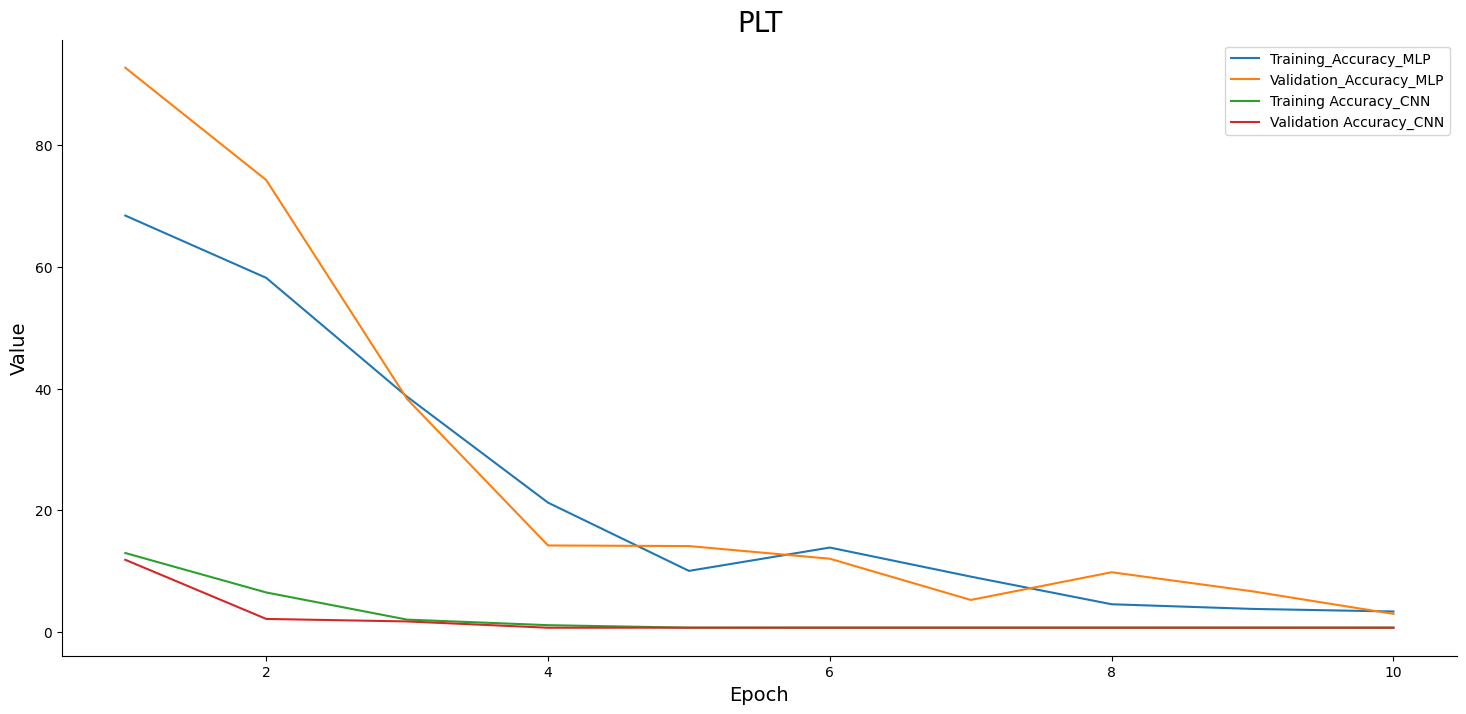

In [11]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 11), history_1.history['loss'], label='Training_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_1.history['val_loss'], label='Validation_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_2.history['loss'], label='Training Accuracy_CNN')
plt.plot(np.arange(1, 11), history_2.history['val_loss'], label='Validation Accuracy_CNN')
plt.title('PLT', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Value', size=14)
plt.legend();

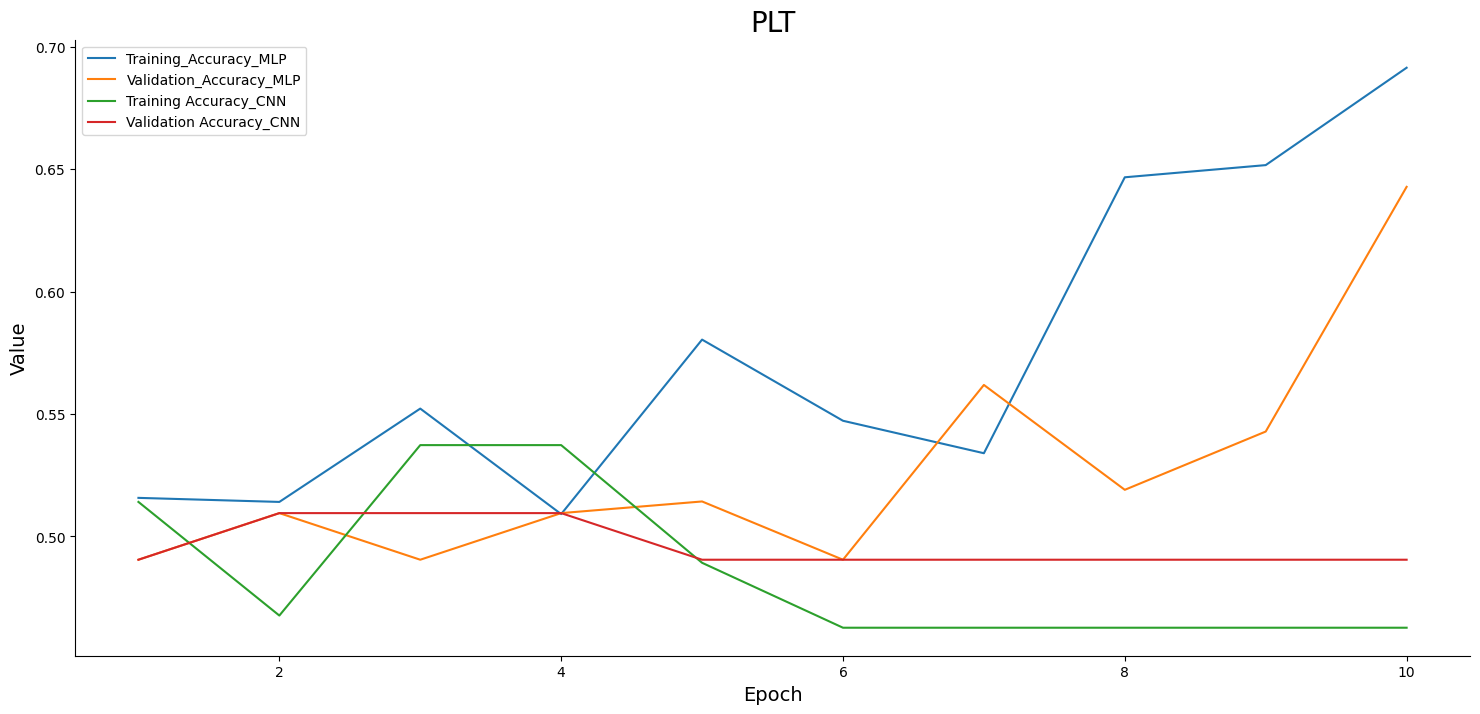

In [12]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 11), history_1.history['accuracy'], label='Training_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_1.history['val_accuracy'], label='Validation_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_2.history['accuracy'], label='Training Accuracy_CNN')
plt.plot(np.arange(1, 11), history_2.history['val_accuracy'], label='Validation Accuracy_CNN')
plt.title('PLT', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Value', size=14)
plt.legend();

5. Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки. 

In [13]:
confusion_matrix(test_labels, np.round(abs(model_1.predict(test_images))))

7/7 [==============================] - 0s 25ms/step


array([[55, 52],
       [23, 80]])

In [14]:
print (confusion_matrix(test_labels, np.round(abs(model_2.predict(test_images)))))

7/7 [==============================] - 1s 50ms/step
[[  0 107]
 [  0 103]]


6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.

7/7 [==============================] - 0s 16ms/step


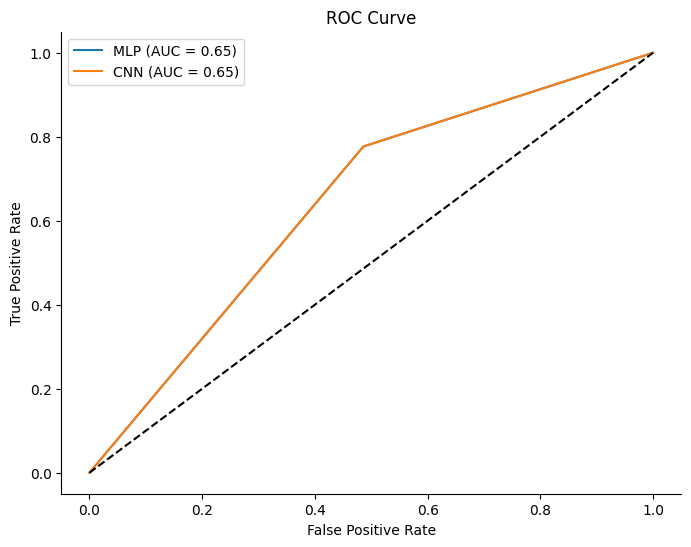

AUC - MLP: 0.6453588603574993
AUC - CNN: 0.6453588603574993


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

mlp_predictions = model_1.predict(test_images)
mlp_predictions = np.round(mlp_predictions).flatten()

cnn_predictions = model_2.predict(test_images)
cnn_predictions = np.round(cnn_predictions).flatten()

# Вычисление ROC-кривых и площадей под ROC-кривыми для MLP модели
mlp_fpr, mlp_tpr, _ = roc_curve(test_labels, mlp_predictions)
mlp_roc_auc = roc_auc_score(test_labels, mlp_predictions)

# Вычисление ROC-кривых и площадей под ROC-кривыми для CNN модели
cnn_fpr, cnn_tpr, _ = roc_curve(test_labels, cnn_predictions)
cnn_roc_auc = roc_auc_score(test_labels, cnn_predictions)

# Визуализация ROC-кривых на одном рисунке
plt.figure(figsize=(8, 6))
plt.plot(mlp_fpr, mlp_tpr, label='MLP (AUC = {:.2f})'.format(mlp_roc_auc))
plt.plot(cnn_fpr, cnn_tpr, label='CNN (AUC = {:.2f})'.format(cnn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Диагональная линия
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Вывод площадей под ROC-кривыми
print('AUC - MLP:', mlp_roc_auc)
print('AUC - CNN:', cnn_roc_auc)


7. Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). 

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import rcParams
import random
from PIL import Image, ImageOps
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
df_train = tfds.as_dataframe(tfds.load("deep_weeds", split='train[:20%]'))
df_test = tfds.as_dataframe(tfds.load("deep_weeds", split='train[20%:30%]'))

df_train1 = []
for i in df_train.values:
    if i[1] in (6,7,8):
        df_train1.append(i)
df_train = pd.DataFrame(df_train1)
df_test1 = []

for i in df_test.values:
    if i[1] in (6,7,8):
        df_test1.append(i)   
df_test = pd.DataFrame(df_test1)

train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

train_images = np.zeros(shape=(df_train.shape[0],256,256,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],256,256,3), dtype=np.float32)

for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))

for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))

train_images /= 255
test_images  /= 255

train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=3)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=3)

In [1]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

model_1.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history_1 = model_1.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=8,
    validation_data=(test_images, test_labels))

Epoch 1/10
280/280 [==============================] - 12s 16ms/step - loss: 2.1557 - accuracy: 0.6740 - val_loss: 0.8858 - val_accuracy: 0.6667
Epoch 2/10
280/280 [==============================] - 2s 8ms/step - loss: 0.8079 - accuracy: 0.7738 - val_loss: 0.7497 - val_accuracy: 0.8767
Epoch 3/10
280/280 [==============================] - 2s 7ms/step - loss: 0.6978 - accuracy: 0.8818 - val_loss: 0.6668 - val_accuracy: 0.8767
Epoch 4/10
280/280 [==============================] - 2s 8ms/step - loss: 0.6305 - accuracy: 0.8818 - val_loss: 0.6159 - val_accuracy: 0.8767
Epoch 5/10
280/280 [==============================] - 2s 8ms/step - loss: 0.5887 - accuracy: 0.8818 - val_loss: 0.5839 - val_accuracy: 0.8767
Epoch 6/10
280/280 [==============================] - 3s 10ms/step - loss: 0.5618 - accuracy: 0.8818 - val_loss: 0.5628 - val_accuracy: 0.8767
Epoch 7/10
280/280 [==============================] - 2s 8ms/step - loss: 0.5433 - accuracy: 0.8818 - val_loss: 0.5478 - val_accuracy: 0.8767
Epo

In [2]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [tf.keras.layers.Conv2D(filters=2, kernel_size=(2, 2), input_shape=(256, 256, 3), activation='relu'),
     tf.keras.layers.Flatten(),tf.keras.layers.Dropout(rate=0.3),
     tf.keras.layers.Dense(32, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')])

model_2.compile(
    loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),
    metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

history_2 = model_2.fit(train_images,
                        train_labels,
                        epochs=10,
                        batch_size=128,
                        validation_data=(test_images, test_labels))

Epoch 1/10
18/18 [==============================] - 13s 346ms/step - loss: 15.5949 - accuracy: 0.7817 - val_loss: 11.5863 - val_accuracy: 0.8767
Epoch 2/10
18/18 [==============================] - 2s 116ms/step - loss: 6.3406 - accuracy: 0.8202 - val_loss: 2.8790 - val_accuracy: 0.8767
Epoch 3/10
18/18 [==============================] - 2s 112ms/step - loss: 3.4427 - accuracy: 0.8235 - val_loss: 1.3485 - val_accuracy: 0.8749
Epoch 4/10
18/18 [==============================] - 2s 111ms/step - loss: 1.8774 - accuracy: 0.8351 - val_loss: 2.0108 - val_accuracy: 0.8773
Epoch 5/10
18/18 [==============================] - 2s 116ms/step - loss: 1.2408 - accuracy: 0.8438 - val_loss: 2.7951 - val_accuracy: 0.4895
Epoch 6/10
18/18 [==============================] - 3s 155ms/step - loss: 1.4029 - accuracy: 0.8289 - val_loss: 0.7956 - val_accuracy: 0.7828
Epoch 7/10
18/18 [==============================] - 2s 114ms/step - loss: 0.7249 - accuracy: 0.8655 - val_loss: 0.7890 - val_accuracy: 0.7660
Epo

8. Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки. 

In [3]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels.argmax(axis=1), model_1.predict(test_images).argmax(axis=1))

35/35 [==============================] - 1s 21ms/step


array([[  0, 206],
       [  0, 908]])

In [4]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels.argmax(axis=1), model_2.predict(test_images).argmax(axis=1))

35/35 [==============================] - 1s 19ms/step


array([[ 30, 176],
       [ 67, 841]])

9. Постройте кривые обучения нейронных сетей многоклассовой классификации для показателей ошибки и доли верных ответов в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.

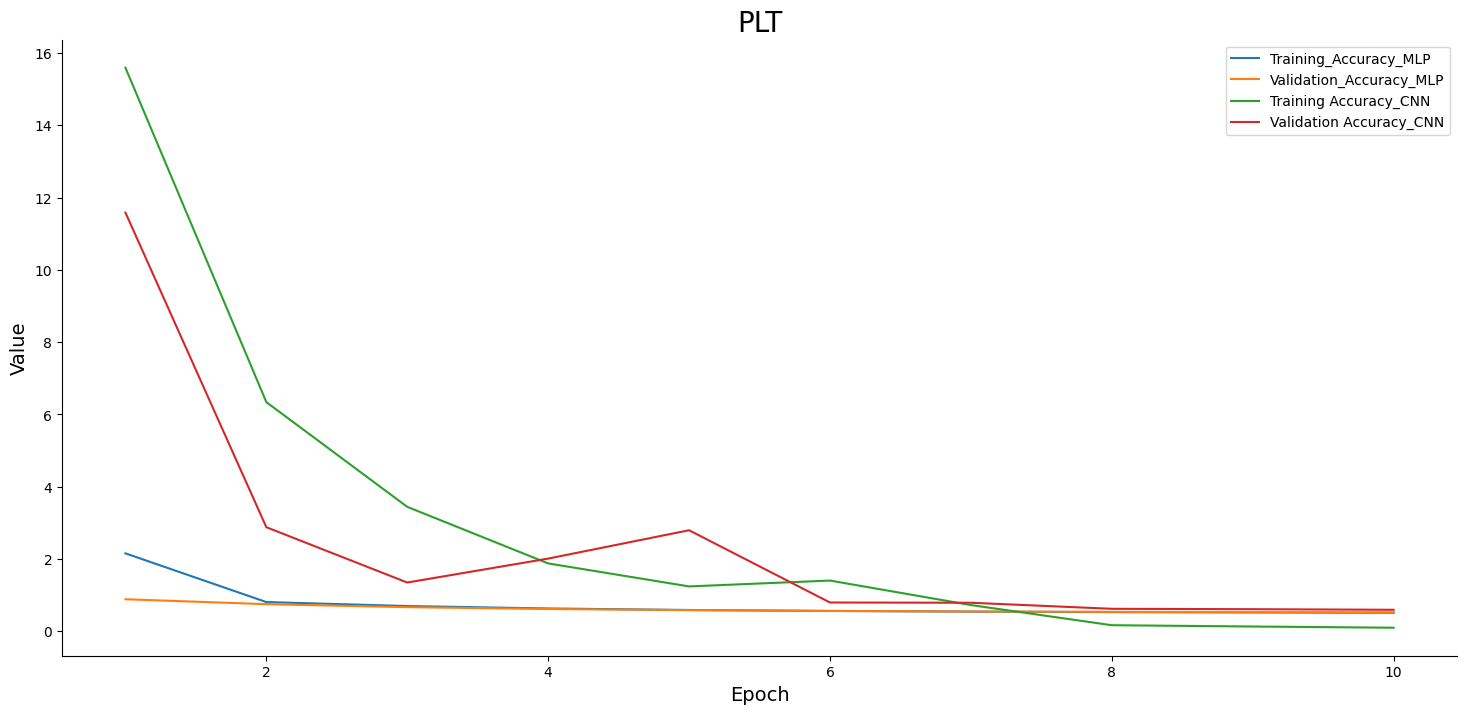

In [5]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 11), history_1.history['loss'], label='Training_loss_MLP')
plt.plot(np.arange(1, 11), history_1.history['val_loss'], label='Validation_loss_MLP')
plt.plot(np.arange(1, 11), history_2.history['loss'], label='Training loss_CNN')
plt.plot(np.arange(1, 11), history_2.history['val_loss'], label='Validation loss_CNN')
plt.title('PLT', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Value', size=14)
plt.legend();

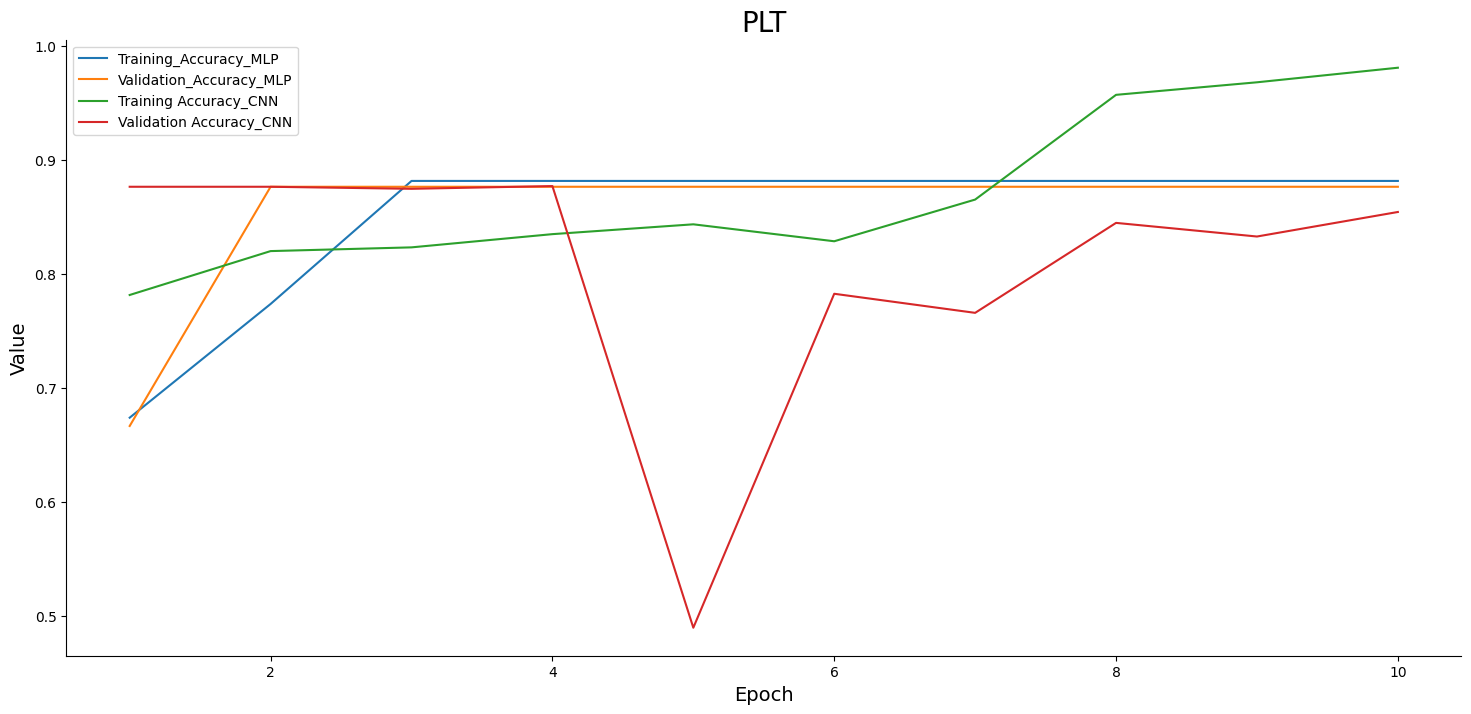

In [6]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 11), history_1.history['accuracy'], label='Training_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_1.history['val_accuracy'], label='Validation_Accuracy_MLP')
plt.plot(np.arange(1, 11), history_2.history['accuracy'], label='Training Accuracy_CNN')
plt.plot(np.arange(1, 11), history_2.history['val_accuracy'], label='Validation Accuracy_CNN')
plt.title('PLT', size=20)
plt.xlabel('Epoch', size=14)
plt.ylabel('Value', size=14)
plt.legend();